# Fraud Detection Project - Main Notebook

Contents:

* [Data Understanding](#Data-Understanding)
    - [Importing Data](#Importing-Data)
    - [Describing Data](#Describing-Data)
    - [Tidying Data](#Tidying-Data)
* [Data Preparation](#Data-Preparation)
    - [Selecting Data](#Selecting-Data)
    - [Cleaning Data](#Cleaning-Data)
    - [Exploratory Data Analysis (EDA)](#EDA)
        + Basic Analysis
        + Univariate EDA
          - Categorical Data
          - Numerical Data
        + Multivariate EDA
          - Correlation and Covariance
          - Scatterplots

## Data Understanding

### Importing Data

In [1]:
# Import necessary modules
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Display 100 columns max
pd.set_option('display.max_columns', 100)

# Display 20 characters max within a cell
# pd.set_option('max_colwidth',60)

In [2]:
# Initiate directory paths
data_folder = '/Users/stb/Documents/Github/fraud-detection/data/'

ads_list = []
with open(data_folder + '/autos_20190626.json','r') as file:
    for ad in file:
        ads_list.append(json.loads(ad))
autos = pd.DataFrame(ads_list)

### Describing Data

In [3]:
autos.head(3)

,Comfort & Convenience,Entertainment & Media,Extras,Safety & Security,Availability,Available from,Body,Body Color,Body Color Original,CO2 Emission,Consumption,Country version,Cylinders,Displacement,Drive chain,Electricity consumption,Emission Class,Emission Label,First Registration,Fuel,Full Service,Gearing Type,Gears,Inspection new,Last Service Date,Last Timing Belt Service Date,Make,Model,Model Code,Next Inspection,Non-smoking Vehicle,Nr. of Doors,Nr. of Seats,Offer Number,Other Fuel Types,Paint Type,Previous Owners,Type,Upholstery,Warranty,Weight,body_type,description,hp,kW,km,make_model,null,prev_owner,price,registration,short_description,url,vat
0,"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...",NaN,NaN,"[\n, Sedans, \n]","[\n, Black, \n]",[\nMythosschwarz\n],[\n99 g CO2/km (comb)\n],"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",NaN,[\n3\n],"[\n1,422 cc\n]",[\nfront\n],NaN,[\nEuro 6\n],NaN,"[\n, 2016, \n]","[\n, Diesel (Particulate Filter), \n]","[\n, \n]","[\n, Automatic, \n]",NaN,"[\nYes\n, \nEuro 6\n]",NaN,NaN,\nAudi\n,"[\n, A1, \n]",[\n0588/BDF\n],"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\n, \n]",[\n5\n],[\n5\n],[\nLR-062483\n],NaN,[\nMetallic\n],\n2\n,"[, Used, , Diesel (Particulate Filter)]","[\nCloth, Black\n]","[\n, \n, \n4 (Green)\n]","[\n1,220 kg\n]",Sedans,"[\n, Sicherheit:, , Deaktivierung für Beifahr...",66 kW,None,"56,013 km",Audi A1,[],2 previous owners,15770,01/2016,Sportback 1.4 TDI S-tronic Xenon Navi Klima,https://www.autoscout24.com//offers/audi-a1-sp...,VAT deductible
1,"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",NaN,NaN,"[\n, Sedans, \n]","[\n, Red, \n]",NaN,[\n129 g CO2/km (comb)\n],"[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",NaN,[\n4\n],"[\n1,798 cc\n]",[\nfront\n],NaN,[\nEuro 6\n],[\n4 (Green)\n],"[\n, 2017, \n]","[\n, Gasoline, \n]",NaN,"[\n, Automatic, \n]",[\n7\n],NaN,NaN,NaN,\nAudi\n,"[\n, A1, \n]",[\n0588/BCY\n],NaN,NaN,[\n3\n],[\n4\n],NaN,NaN,NaN,NaN,"[, Used, , Gasoline]","[\nCloth, Grey\n]",NaN,"[\n1,255 kg\n]",Sedans,[\nLangstreckenfahrzeug daher die hohe Kilomet...,141 kW,None,"80,000 km",Audi A1,[],None,14500,03/2017,1.8 TFSI sport,https://www.autoscout24.com//offers/audi-a1-1-...,Price negotiable
2,"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",NaN,NaN,"[\n, Sedans, \n]","[\n, Black, \n]",[\nmythosschwarz metallic\n],[\n99 g CO2/km (comb)\n],"[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",NaN,NaN,"[\n1,598 cc\n]",[\nfront\n],NaN,[\nEuro 6\n],[\n4 (Green)\n],"[\n, 2016, \n]","[\n, Diesel (Particulate Filter), \n]",NaN,"[\n, Automatic, \n]",NaN,NaN,NaN,NaN,\nAudi\n,"[\n, A1, \n]",NaN,NaN,NaN,[\n4\n],[\n4\n],[\nAM-95365\n],NaN,[\nMetallic\n],\n1\n,"[, Used, , Diesel (Particulate Filter)]","[\nCloth, Black\n]","[\n, \n, \n99 g CO2/km (comb)\n]",NaN,Sedans,"[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",85 kW,None,"83,450 km",Audi A1,[],1 previous owner,14640,02/2016,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,https://www.autoscout24.com//offers/audi-a1-sp...,VAT deductible


In [4]:
# Show the proportion of missing values which are higher than 0.5
autos.isnull().mean()[autos.isnull().mean() > 0.5].sort_values(ascending=False)

kW                               1.000000
Last Timing Belt Service Date    0.998995
Electricity consumption          0.991394
Available from                   0.982913
Last Service Date                0.964445
Availability                     0.960111
Other Fuel Types                 0.944720
Next Inspection                  0.777938
Inspection new                   0.753000
Emission Label                   0.749670
Model Code                       0.687292
Non-smoking Vehicle              0.549155
Country version                  0.523463
dtype: float64

### Tidying Data

In [5]:
%run -i "/Users/stb/Documents/Github/fraud-detection/functions/name_columns.py"

In [6]:
# Tidy column names
autos.columns = name_columns(autos)

## Data Preparation

### Selecting Data

In [7]:
t_cols = ['safety_security', 'co2_emission', 'consumption', 'country_version', 
          'cylinders', 'displacement', 'make', 'model', 'model_code', 'next_inspection',
          'non_smoking_vehicle', 'body_type', 'description', "hp", 'kw', 'km', "make_model", 
          "offer_number"]

m_cols = ['entertainment_media', 'availability', 'available_from', 'body',
        'body_color', 'body_color_original', 'full_service', 'gearing_type', 'gears',
        'inspection_new', 'last_service_date', 'last_timing_belt_service_date', 'paint_type',
        'null', 'price', 'registration', 'short_description', 'vat']

v_cols = ['comfort_convenience', 'extras', 'drive_chain',
         'electricity_consumption', 'emission_class', 'emission_label',
         'first_registration', 'fuel', 'nr_of_doors', 'nr_of_seats',
         'other_fuel_types', 'previous_owners', 'type', 'upholstery', 'warranty',
         'weight', 'prev_owner', 'url']

### Cleaning Data

In [8]:
%run -i "/Users/stb/Documents/Github/fraud-detection/functions/clean_t.py"
%run -i "/Users/stb/Documents/Github/fraud-detection/functions/clean_m.py"
%run -i "/Users/stb/Documents/Github/fraud-detection/functions/clean_v.py"

In [9]:
# Clean t_cols and return the new cleaned DataFrame to df_t
df_t = clean_t(autos[t_cols])

# Clean m_cols return the new cleaned DataFrame to df_m
df_m = clean_m(autos[m_cols])

# Clean v_cols return the new cleaned DataFrame to df_v
df_v=clean_v(autos[v_cols])

/Users/stb/Documents/Github/fraud-detection/functions/clean_v.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_v = df_v.join(df_v['comfort_convenience'].str.join('|').str.get_dummies().add_prefix('cc_'))
/Users/stb/Documents/Github/fraud-detection/functions/clean_v.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Create dummies using the items in the list of 'safety&security' column
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [11]:
# Join (left join) two DataFrames
df_2 = df_t.join(df_m)

# Join (left join) two DataFrames
df = df_2.join(df_v)

### EDA

Exploratory data analysis is generally cross-classified in two ways. First, each method is either non-graphical or graphical. And second, each method is either univariate or multivariate (usually just bivariate).
 > The four types of EDA are: univariate non-graphical, multivariate nongraphical, univariate graphical, and multivariate graphical.

Non-graphical methods generally involve calculation of summary statistics, while graphical methods obviously summarize the data in a diagrammatic or pictorial way. Univariate methods look at one variable (data column) at a time, while multivariate methods look at two or more variables at a time to explore
relationships. Usually our multivariate EDA will be bivariate (looking at exactly two variables), but occasionally it will involve three or more variables. It is almost always a good idea to perform univariate EDA on each of the components of a multivariate EDA before performing the multivariate EDA.


[source](https://www.stat.cmu.edu/~hseltman/309/Book/chapter4.pdf)

#### Basic Analysis

In [12]:
df.shape

(15919, 135)

In [47]:
df.head(3)

,co2_emission,country_version,cylinders,displacement,make,model,model_code,next_inspection,body_type,description,hp,km,offer_number,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,next_inspection_bool,consumption_comb,available_from,body,body_color,gearing_type,gears,inspection_new,...,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,weight_kg
0,99.0,NaN,3.0,1422.0,Audi,A1,0588/BDF,06/2021,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,66.0,56013.0,LR-062483,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,True,3.8,NaT,Sedans,Black,Automatic,NaN,1,...,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1220.0
1,129.0,NaN,4.0,1798.0,Audi,A1,0588/BCY,NaN,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,141.0,80000.0,NaN,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,False,5.6,NaT,Sedans,Red,Automatic,7,0,...,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1255.0
2,99.0,NaN,NaN,1598.0,Audi,A1,NaN,NaN,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,85.0,83450.0,AM-95365,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,False,3.8,NaT,Sedans,Black,Automatic,NaN,0,...,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NaN


In [48]:
df.tail(3)

,co2_emission,country_version,cylinders,displacement,make,model,model_code,next_inspection,body_type,description,hp,km,offer_number,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,next_inspection_bool,consumption_comb,available_from,body,body_color,gearing_type,gears,inspection_new,...,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,weight_kg
15916,139.0,Austria,4.0,1997.0,Renault,Espace,NaN,NaN,Van,Sicherheit: Deaktivierung für Beifahrer-Airbag...,146.0,15.0,Espace16,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0,False,5.3,NaT,Van,White,Automatic,6,1,...,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
15917,139.0,NaN,4.0,1997.0,Renault,Espace,NaN,NaN,Van,Sicherheit: Deaktivierung für Beifahrer-Airbag...,147.0,10.0,2691331,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,1,0,False,5.3,NaT,Van,Grey,Automatic,6,0,...,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1758.0
15918,153.0,Germany,4.0,1798.0,Renault,Espace,3333/BHJ,NaN,Van,Sicherheit: Deaktivierung für Beifahrer-Airbag...,165.0,NaN,Re_30000008029,1,0,0,0,1,0,0,1,0,1,1,1,0,0,0,1,1,1,0,0,0,1,1,0,1,1,0,1,0,False,6.8,NaT,Van,Grey,Automatic,NaN,1,...,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1685.0


In [14]:
df.describe()

,co2_emission,cylinders,displacement,hp,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,inspection_new,price,age,entertainment_media_bluetooth,entertainment_media_cd_player,entertainment_media_digital_radio,entertainment_media_hands_free_equipment,entertainment_media_mp3,entertainment_media_on_board_computer,entertainment_media_radio,entertainment_media_sound_system,entertainment_media_television,entertainment_media_usb,available_after_days,warranty,cc_air_conditioning,cc_air_suspension,...,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres
count,13483.000000,10239.000000,15423.000000,15831.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,14322.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,635.000000,15919.000000,15919.00000,15919.000000,...,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.00000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.00000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000
mean,117.953942,3.797343,1423.540881,88.367696,0.887619,0.081852,0.128212,0.120736,0.081098,0.798229,0.150575,0.654061,0.031786,0.873296,0.828381,0.197940,0.099001,0.515862,0.137320,0.659526,0.737735,0.345876,0.192537,0.191846,0.004711,0.843960,0.854262,0.054400,0.829386,0.666122,0.691249,0.124128,0.222313,0.224260,18019.896727,1.542382,0.731830,0.300961,0.140021,0.584522,0.367674,0.749921,0.753125,0.140712,0.002199,0.512469,76.725984,0.659526,0.89924,0.003895,...,0.683523,0.000063,0.063006,0.746341,0.117218,0.058860,0.038068,0.189522

Summary statistics of numeric columns show that:
- `max` value of 'co2_emission' column is problematic
- `max` value of 'displacement' column is problematic
- `min` value of 'hp' is problematic
- `max` value of 'price' is not really high as one might expect
- `min` value of 'price' is problematic

In [15]:
# Describe the columns with "object" data type
df.describe(include = "object")

,country_version,make,model,model_code,next_inspection,body_type,description,km,offer_number,consumption_comb,body,body_color,gearing_type,gears,paint_type,vat,drive_chain,emission_class,emission_label,first_registration,fuel,nr_of_doors,nr_of_seats,previous_owners,type,upholstery,prev_owner,url,weight_kg
count,7586,15919,15919,4978,3535,15859,15919,14895,12744,13036,15859,15322,15919,11207,10147,11406,9061,12291,3945,14322,15919,15707,14942,9279,15917,12199,9091,15919,8945
unique,23,3,9,232,69,9,1,6689,11440,58,9,14,3,10,3,2,3,6,5,4,77,6,6,5,5,46,4,15919,434
top,Germany,Opel,A3,0035/BCB,,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,10,AK13780,3.9,Sedans,Black,Manual,6,Metallic,VAT deductible,front,Euro 6,4 (Green),2018,Diesel (Particulate Filter),5,5,1,Used,"Cloth, Black",1,https://www.autoscout24.com//offers/opel-insig...,1163
freq,4502,7343,3097,268,710,7903,15919,1045,27,732,7903,3745,8153,5822,9794,10980,8886,10139,3553,4522,4315,11575,13336,8294,11096,5821,8294,1,574


Summary of the `object` columns show that:
- 'next_inspection' column has some empty space (" ") entries (Those should be NaNs
- type of 'next_inspection' should be `date_time` or `numeric`
- type of 'km' should be `numeric`
- type of 'consumption_comb' should be `numeric`
- There are 10! differing gears which sounds problematic
- type of 'first_registration' should be date_time or `numeric`
- There are 77 'fuel' types, which is not normal. Further investigation requiered
- type of 'nr_of_doors', 'nr_of_seats', 'previous_owners', and 'weight_kg' should be `numeric`
- There are duplicate 'previous owners' columns
- 'body' and 'body_type' are the same. We can drop one.

In [16]:
# Show colums of which data types is 'object'
df.dtypes[df.dtypes == 'object']

country_version       object
make                  object
model                 object
model_code            object
next_inspection       object
body_type             object
description           object
km                    object
offer_number          object
consumption_comb      object
body                  object
body_color            object
gearing_type          object
gears                 object
paint_type            object
vat                   object
drive_chain           object
emission_class        object
emission_label        object
first_registration    object
fuel                  object
nr_of_doors           object
nr_of_seats           object
previous_owners       object
type                  object
upholstery            object
prev_owner            object
url                   object
weight_kg             object
dtype: object

In [17]:
# Change wrong data types to numeric
df['km'] = pd.to_numeric(df['km'])
df['consumption_comb'] = pd.to_numeric(df['consumption_comb'])

In [18]:
df[['km', 'consumption_comb']].describe()

,km,consumption_comb
count,14895.000000,13036.000000
mean,34130.127828,4.784527
std,37352.977568,0.919294
min,0.000000,0.000000
25%,5153.000000,4.000000
50%,22740.000000,4.700000
75%,49371.500000,5.400000
max,317000.000000,9.100000


- `min` of 'km' is 0 which may be problematic
- `min` of 'consumption_comb' is 0 which is be problematic. We may need to change that to NaN

In [19]:
# Change wrong data type to date_time
df['first_registration'] = pd.to_datetime(df.first_registration, format='%Y')

# Change wrong data types to numeric
df['nr_of_doors'] = pd.to_numeric(df['nr_of_doors'])
df['nr_of_seats'] = pd.to_numeric(df['nr_of_seats'])
df['previous_owners'] = pd.to_numeric(df['previous_owners'])
df['weight_kg'] = pd.to_numeric(df['weight_kg'])

In [20]:
df[['nr_of_doors', 'nr_of_seats', 'previous_owners', 'weight_kg']].describe()

,nr_of_doors,nr_of_seats,previous_owners,weight_kg
count,15707.000000,14942.000000,9279.000000,8945.000000
mean,4.656077,4.949873,1.067895,1351.106540
std,0.645298,0.489872,0.329812,220.661532
min,1.000000,2.000000,0.000000,1.000000
25%,4.000000,5.000000,1.000000,1165.000000
50%,5.000000,5.000000,1.000000,1288.000000
75%,5.000000,5.000000,1.000000,1487.000000
max,7.000000,7.000000,4.000000,2471.000000


- min of 'weight_kg' is very low (1)

Text(0.5, 1.0, 'Data Types of Columns')

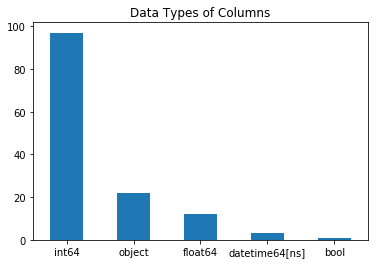

In [21]:
# Show data types of columns in numbers
df.dtypes.value_counts().plot.bar(rot=0)
plt.title("Data Types of Columns")

In [57]:
# Data types of columns
df.dtypes.value_counts()

int64             97
object            29
float64            6
datetime64[ns]     2
bool               1
dtype: int64

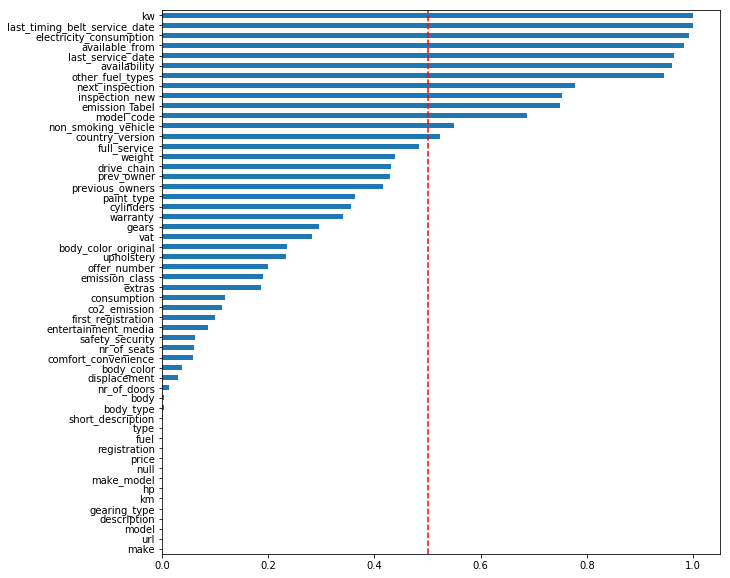

In [22]:
# Percentage of missing values withing columns (initial dataset before cleaning)
ax = autos.isnull().mean().sort_values().plot.barh(figsize=(10,10))
ax.axvline(x=0.5, color='r', linestyle='--')

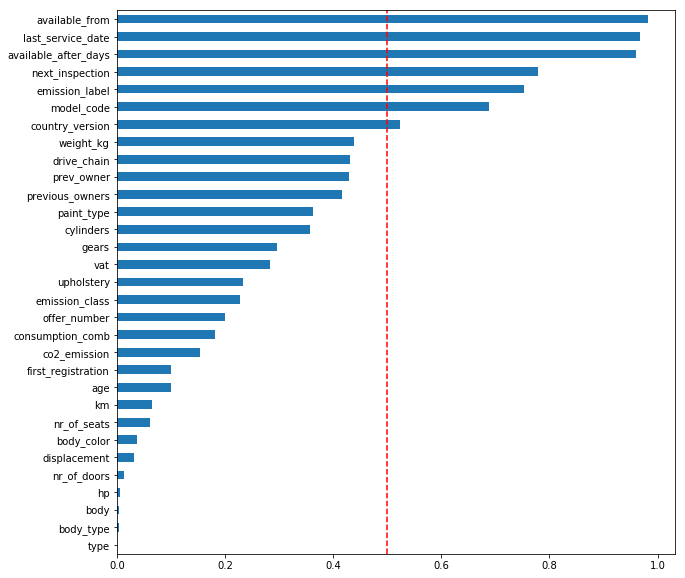

In [23]:
# Percentage of missing values withing columns (new dataset with missing values > 0)
ax = df.isnull().mean()[df.isnull().mean() > 0].sort_values().plot.barh(figsize=(10,10))
ax.axvline(x=0.5, color='r', linestyle='--')

In [ ]:
# !pip install pandas-profiling

In [32]:
# import pandas_profiling
# #df.profile_report()

# profile = df.profile_report(title='Pandas Profiling Report')
# profile.to_file(output_file="output.html")

#### Univariate EDA

##### Categorical Data

###### Make

In [39]:
df.make.value_counts(dropna=False)

Opel       7343
Audi       5712
Renault    2864
Name: make, dtype: int64

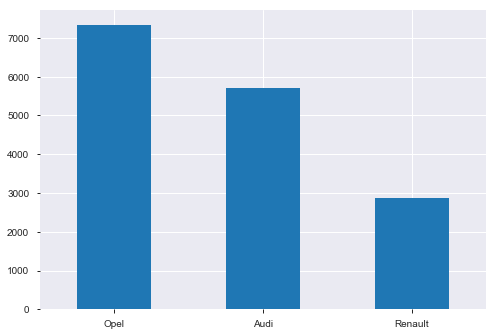

In [44]:
df.make.value_counts().plot.bar(rot=0)

###### Model

In [24]:
df.model.value_counts()

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: model, dtype: int64

In [46]:
# Number of auto make-models
df.groupby(['make','model']).size()

make     model   
Audi     A1          2614
         A2             1
         A3          3097
Opel     Astra       2526
         Corsa       2219
         Insignia    2598
Renault  Clio        1839
         Duster        34
         Espace       991
dtype: int64

###### Body Type

In [59]:
df.body_type.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

###### Body Color

In [74]:
df.body_color.value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

###### Fuel > Needs feature engineering

We need to create 2/3 categories: Gasoline, Diesel, (electric, LPG). For instance, we should put, "super 95", "Benzine", and "Regular" to `Gasoline` category.

In [72]:
df.fuel.nunique()

77

In [73]:
df.fuel.value_counts()[0:10]

Diesel (Particulate Filter)                4315
Super 95                                   3338
Gasoline                                   3175
Diesel                                     2984
Super 95 / Regular/Benzine 91               424
Regular/Benzine 91                          354
Super E10 95                                331
Super 95 (Particulate Filter)               268
Super 95 / Super E10 95                     131
Regular/Benzine 91 (Particulate Filter)     100
Name: fuel, dtype: int64

###### Drive Chain

Ornek: 4 cekerli, onden cekerli arkadan cekerli

In [58]:
df.drive_chain.value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

###### Dummy Columns

In [27]:
dummy_prefixes = ['ss_', 'cc_', 'ext_', 'entertainment_']

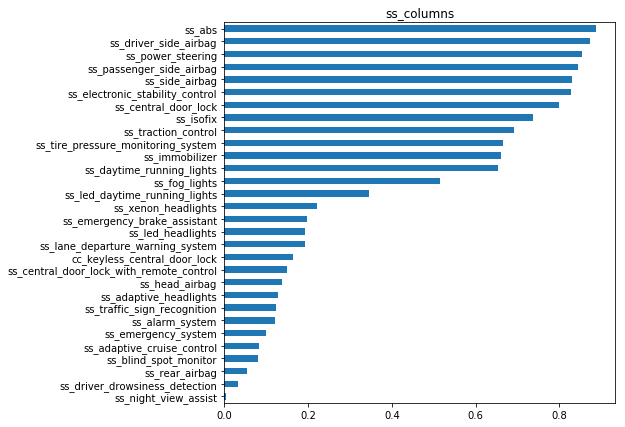

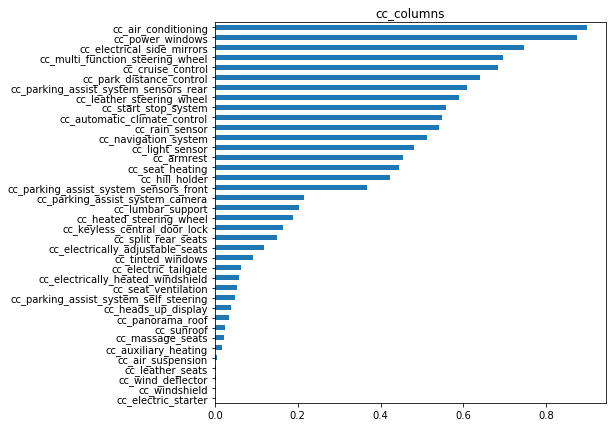

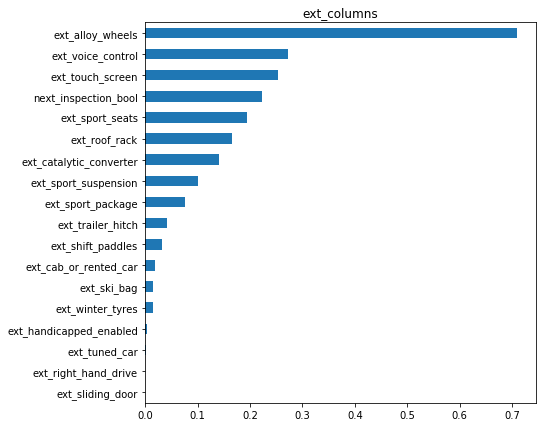

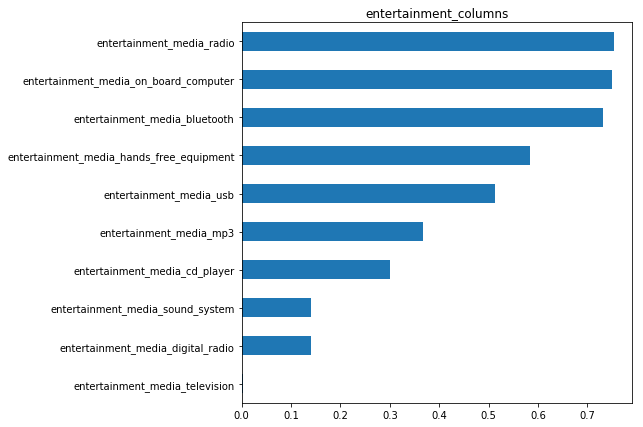

In [28]:
# Percentage '1's in Dummy columns
for i in dummy_prefixes:
    df.filter(like = i, axis = 1).mean().sort_values().plot.barh(figsize=(7,7))
    plt.title(i + "columns")
    plt.show()

##>> There seems to be many properties which are not very common among cars
##>>> However, those properties might prove more significant since the ones -such as ABS- 
##>>>> of which almost all the cars have may not affect the price

##### Numerical Data

In [155]:
# Show colums of which data types is 'object'
df.describe()

,co2_emission,cylinders,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,entertainment_media_bluetooth,entertainment_media_cd_player,entertainment_media_digital_radio,entertainment_media_hands_free_equipment,entertainment_media_mp3,entertainment_media_on_board_computer,entertainment_media_radio,entertainment_media_sound_system,entertainment_media_television,entertainment_media_usb,available_after_days,nr_of_doors,...,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,weight_kg
count,13483.000000,10239.000000,15423.000000,15831.000000,14895.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,13036.000000,15919.000000,15919.000000,14322.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,635.000000,15707.000000,...,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.00000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.00000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,15919.000000,8945.000000
mean,117.953942,3.797343,1423.540881,88.367696,34130.127828,0.887619,0.081852,0.128212,0.120736,0.081098,0.798229,0.150575,0.654061,0.031786,0.873296,0.828381,0.197940,0.099001,0.515862,0.137320,0.659526,0.737735,0.345876,0.192537,0.191846,0.004711,0.843960,0.854262,0.054400,0.829386,0.666122,0.691249,0.124128,0.222313,4.784527,0.224260,18019.896727,1.542382,0.731830,0.300961,0.140021,0.584522,0.367674,0.749921,0.753125,0.140712,0.002199,0.512469,76.725984,4.656077,...,0.000063,0.063006,0.746341,0.117218,0.058860,0.038068,0.189522,0.423708,0.164143,0.003015

###### Price

The data is **not** randomly sampled. The results may be different than the original statistics.

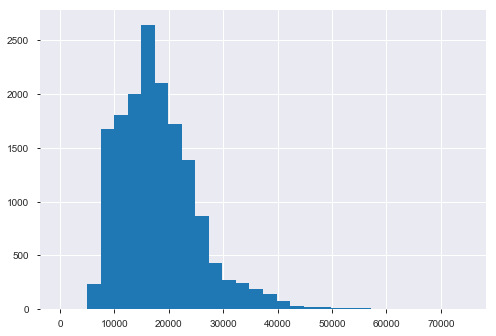

In [148]:
df.price.hist(bins=30)

In [142]:
df.price.describe()

count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

#### Multivariate EDA

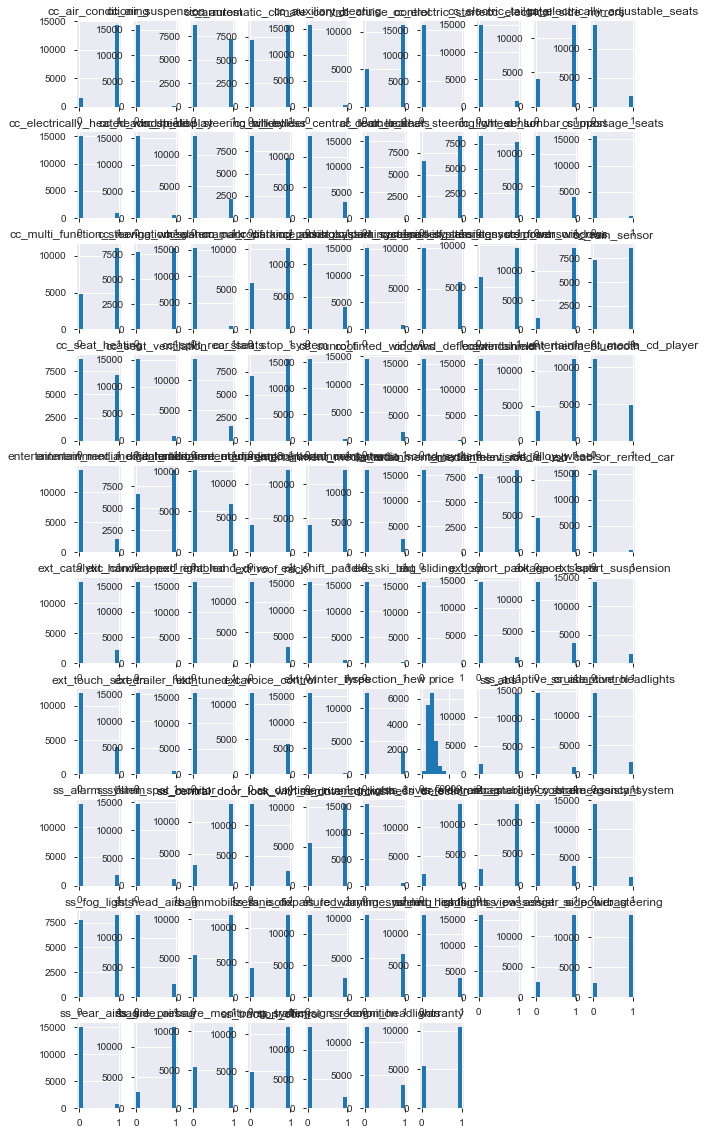

In [56]:
df.select_dtypes(include=['integer']).hist(figsize=(10,20))
plt.show()

##### Get_dummies ile olusturulan sutunlari filtrelemek icin daha iyi bir isimlendirmeye ihtiyac var.
##### Ornegin 'column name'in "_" ile baslamasi

##### Kendi aramizda dummy sutunlar icin isimlendirme standardizasyonu >>> Tam isim mi, kisalma mi?

##### Make-Model

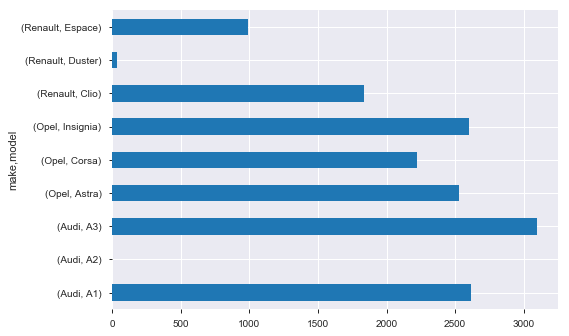

In [104]:
df.groupby(['make', 'model']).size().plot.barh()

##### Make-Model vs Price

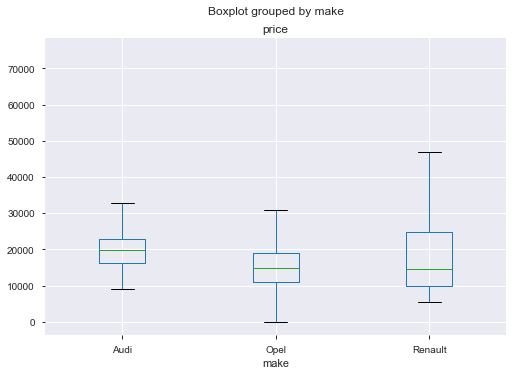

In [138]:
df.boxplot(column="price", by='make')

> I would expect Audi as being the most expensive car. In terms of mean values, Audi seems to be the highest. However, IQR's show a different picture. This result needs to be further investigated. This problem is possibly becauese of scraping of only a small portion of auto makes-models.

In [139]:
df.groupby('make').price.describe()

,count,mean,std,min,25%,50%,75%,max
make,,,,,,,,
Audi,5712.0,20022.278711,4909.547072,5555.0,16186.75,19890.0,22900.0,74600.0
Opel,7343.0,16379.397249,7071.499895,13.0,10990.00,14990.0,18989.0,52120.0
Renault,2864.0,18232.390363,10585.712252,5445.0,9999.00,14503.0,24900.0,68320.0


##### Price vs Age, Km, Hp

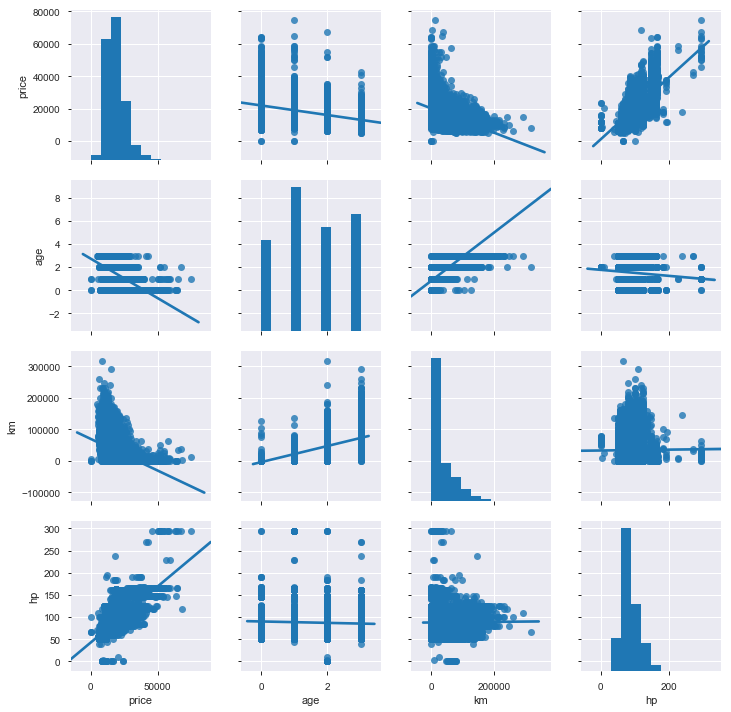

In [168]:
import seaborn as sns

sns.pairplot(df[['price', 'age', 'km', 'hp']], kind="reg")